# Statistical Inference

## Frequentist vs. Bayesian Estimation

## Statistical Inference <a class="anchor" id="one"></a>

Statistical *inference* is about drawing conclusions from data, specifically determining the properties of a population by data sampling.

Three examples of inference are:
1. What is the best estimate for a model parameter?

If we measure some data recorded by/as a random variable $d = \{x_i\}$, we can have a model (M) that describes $\{x_i\}$ using a set of parameters $\vec{\theta}$. There will be a true set of values for these parameters in nature $\vec{\theta}_{0}$, but our parameter estimation returns our best estimates of this based on the measurements we've made. Ideally, if our experiment is precise, if the noise is low and the number of measurements is large, we will be closer to this true value. 
   
2. How confident are we about our result?
3. Are the data consistent with a particular model/hypothesis?

### Some Terminology

* We typically study the properties of some ***population*** by measuring ***samples*** from that population. The population doesn't have to refer to different objects. E.g., we may be (re)measuring the position of an object at rest; the population is the distribution of (an infinite number of) measurements smeared by the uncertainty, and the sample are the measurement we've actually taken.


* A ***statistic*** is any function of the sample. For example, the sample mean is a statistic. But also, "the value of the first measurement" is also a statistic. Don't stress too much about how to make a statistic; it's just a way of summarizing data in a way that helps reveal the presence of a signal. We will meet ways of finding the optimal statistic for a given scenario.


* To conclude something about the population from the sample, we develop ***estimators***. An estimator is a statistic, a rule for calculating an estimate of a given quantity based on observed data.


* There are ***point*** and ***interval estimators***. The point estimators yield single-valued results (example: the position of an object), while with an interval estimator, the result would be a range of plausible values (example: confidence interval for the position of an object).


* Measurements have **uncertainties** (not errors) and we need to account for these (sometimes they are unknown). Data are not variables but fixed values.

### Frequentist vs. Bayesian Inference

There are two major statistical paradigms that address the statistical inference questions: 
- the **classical**, or **frequentist** paradigm,
- the **Bayesian** paradigm.

While most of statistics and machine learning is based on the classical paradigm, Bayesian techniques are being embraced by the statistical and scientific communities at an ever-increasing pace...especially in astrophysics.

#### Key differences
- **Definition of probabilities**:
    - In ***frequentist inference***, probabilities describe the ***relative frequency of events*** over repeated experimental trials. 
    - In ***Bayesian infernece***, probabilities instead quantify our ***subjective belief about experimental outcomes, model parameters, or even models themselves***. 
    
    
- **Quantifying uncertainty**:
    - In ***frequentist inference*** we have ***confidence levels*** that describe the distribution of the measured parameter from the data around the true value.
    - In ***Bayesian inference*** we have ***credible regions*** derived from posterior probabilitiy distributions (we'll meet these later). These encode our "***belief spread***" in model parameters.

For an in-depth and practical discussion: http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/


## Maximum Likelihood Estimation (MLE) <a class="anchor" id="two"></a>

Let's talk about maximum likelihood estimation ($\S 4.2$ in the textbook), which is relevant to both Bayesian and Frequentist approaches.

### Maximum Likelihood Approach

Maximum likelihood estimation follows this blueprint:

1. **Hypothesis**: Formulate a model, a *hypothesis*, about how the data are generated. For example, the data are a measurement of some quantity with Gaussian random uncertainties (i.e., each measurement is equal to the true value, plus a deviation randomly drawn from the normal distribution). Models are typically described using a set of model parameters $\boldsymbol{\theta}$, and written as $\boldsymbol{M}(\boldsymbol{\theta})$.


2. **Maximum Likelihood Estimation**: Search for the "best" model parameters $\boldsymbol{\theta}$ which maximize the ***likelihood*** $L(\boldsymbol{\theta}) \equiv p(D|M)$. This search yields the MLE *point estimates*, $\boldsymbol{\theta^0}$.


3. **Quantifying Estimate Uncertainty**: Determine the confidence region for model parameters, $\boldsymbol{\theta^0}$. Such a confidence estimate can be obtained analytically (possibly with some approximations), but can also be done numerically for arbitrary models using general frequentist techniques, such as bootstrap, jackknife, and cross-validation (we'll come to these later).


4. **Hypothesis Testing**: Perform hypothesis tests as needed to make other conclusions about models and point estimates. Possibly GOTO #1.



### The Likelihood Function

If we know the distribution from which our data were drawn (or make a hypothesis about it), then we can compute the **probability** of our data being generated.

For example, if our data are generated by a Gaussian process with mean $\mu$ and standard deviation $\sigma$, then the probability density of a certain value $x$ is

$$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right).$$

If we want to know the total probability of our ***entire*** data set (as opposed to one measurement) then we must compute the ***product*** of all the individual probabilities:

$$L \equiv p(\{x_i\}|M(\theta)) = \prod_{i=1}^N p(x_i|M(\theta)),$$

where $M$ is the *model* and $\theta$ refers collectively to the $k$ parameters of the model, which can generally be multi-dimensional. In words...

> $L(\{x_i\})\equiv$ the probability of the data given the model parameters. 

If we consider $L$ as a function of the model parameters, we refer to it as

> $L(\theta)\equiv$ likelihood of the model parameters, given the observed data. 

Note:

- while the components of $L$ may be normalized pdfs, their product is not.
- the product can be very small, so we often take the log of $L$. 
- we're assuming the individual measurements are independent of each other.

We can write $L$ out as

$$L = \prod_{i=1}^N \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right),$$

and simplify to

$$L = \left(  \frac{1}{\sigma\sqrt{2\pi}} \right)^N \exp\left( -\frac{1}{2} \sum \left[\frac{-(x_i-\mu)}{\sigma} \right]^2 \right),$$

where we have written the ***product of the exponentials as the exponential of the sum of the arguments***, which will make things easier to deal with later.

To repeat, all we have done is this: 

$$\prod_{i=1}^N A_i \exp(-B_i) = (A_iA_{i+1}\ldots A_N) \exp[-(B_i+B_{i+1}+\ldots+B_N)]$$

We can write $L$ out as

$$L = \prod_{i=1}^N \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right),$$

and simplify to

$$L = \left(  \frac{1}{\sigma\sqrt{2\pi}} \right)^N \exp\left( -\frac{1}{2} \sum \left[\frac{-(x_i-\mu)}{\sigma} \right]^2 \right),$$

where we have written the ***product of the exponentials as the exponential of the sum of the arguments***, which will make things easier to deal with later.

To repeat, all we have done is this: 

$$\prod_{i=1}^N A_i \exp(-B_i) = (A_iA_{i+1}\ldots A_N) \exp[-(B_i+B_{i+1}+\ldots+B_N)]$$


### The Key Idea Behind Maximum Likelihood Estimation

Let's say that we know that some data were drawn from a Gaussian distribution, but we don't know the $\theta = (\mu,\sigma)$ values of that distribution (i.e., the parameters).

Then Maximum Likelihood Estimation method tells us to think of the likelihood as a ***function of the unknown model parameters***, and to ***find the parameters that maximize the value of $L$***. Those will be our *Maximum Likelihood Estimators* for for the true values of the model.

Take a look at this [animation of linear least squares fitting](https://yihui.org/animation/example/least-squares/).

They are trying to fit a line to some data by trying different intercepts and slopes. The red dashed lines show the difference (*residual*) between the model predicted value and the actual value. These are squared and summed ($\chi^2$) and plotted as the $y$-axis in the right hand plot. The best-fit model parameters minimize the $\chi^2$ value and maximize the likelihood.

## MLE applied to a Homoscedastic Gaussian <a class="anchor" id="three"></a>

#### HOMO vs HETERO "scedastic":

*Scedasticity: The distribution of error terms in a set of random variables.*

In a measurement, uncertainties being the same is known as having **homoscedastic** uncertainties which just means "uniform uncertainties".  Later we will consider the case where the measurements can have different uncertainties ($\sigma_i$) which is called **heteroscedastic**.

Let's take a look at an astrometry example, using a model where all the measurements have the same uncertainty, drawn from a normal distribution, $N(0, \sigma)$.


##### Example: Measuring the Position of a Quasar

Let's assume we wish to estimate the position $x$ of a quasar from a series of individual astrometric measurements.

1. We adopt a model where the observed quasar does not move, and has individual measurement uncertainties 
2. We derive the expression for the likelihood of there being a quasar at position $x_0$ that gives rise to our individual measurements. We find the value of $\hat x_0$ for which our observations are maximally likely.
3. We determine the uncertainties (confidence intervals) on our measurement.
4. We test whether what we've observed is consistent with our adopted model. For example, is it possible that the quasar was really a misidentified star with measurable proper motion?

Note: in the text to come, we will use $\mu$ instead of $x_0$ to denote the true position of the quasar. This is to avoid potential confusion with the first (or zeroth) measurement of $x$.


We have an experiment with the set of measured positions $D=\{x_i\}$ in 1D with Gaussian uncertainties, and therefore:

$$L \equiv p(\{x_i\}|\mu,\sigma) = \prod_{i=1}^N \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right).$$

Note that that is $p(\{x_i\})$ not $p(x_i)$, that is the probability of the full data set, not just one measurement. If $\sigma$ is both constant and *known*, then this is a one parameter model with $k=1$ and $\theta_1=\mu$.

As we found above, likelihoods can be really small, so let's define the **log-likelihood function** as ${\ln L} = \ln[L(\theta)]$.  The maximum of this function happens at the same place as the maximum of $L$.  Note that any constants in $L$ have the same effect for all model parameters, so constant terms can be ignored.  

In this case we then have 

$${\rm lnL} = {\rm constant} - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma^2}.$$

Take a second and make sure that you understand how we got there.  It might help to remember that above, we wrote

$$L = \left( \frac{1}{\sigma\sqrt{2\pi}} \right)^N \exp\left( -\frac{1}{2} \sum \left[\frac{-(x_i-\mu)}{\sigma} \right]^2 \right).$$

We then determine the maximum in the same way that we always do.  It is the parameter set for which the derivative of ${\rm lnL}$ is zero:

$$\frac{d\;{\rm lnL}(\mu)}{d\mu}\Biggr\rvert_{\hat \mu} \equiv 0.$$

That gives $$ \sum_{i=1}^N \frac{(x_i - \hat \mu)}{\sigma^2} = 0.$$

Note: 
- We should also check that the $2^{\rm nd}$ derivative is negative, to ensure this is the *maximum* of $L$.
- Any constants in $\ln L$ disappear when differentiated, so constant terms can typically be ignored. This will change if we're trying to select between different models, rather than just parameter estimation within a single model as we're doing here.

Since $\sigma = {\rm constant}$ (not always, but here at least), that says 

$$\sum_{i=1}^N x_i = \sum_{i=1}^N \hat \mu = N \hat \mu.$$

Thus we find that

$$\hat \mu = \frac{1}{N}\sum_{i=1}^N x_i,$$

***which is just the sample arithmetic mean of all the measurements!*** Thus **the sample mean is a ML estimator**. We got there in a roundabout way, but still pretty easy.



### Properties of ML Estimators

Assuming the data truly are drawn from the model, ML estimators have the following useful properties:

* **They are consistent estimators**. They converge to the true parameter value as $N\to\infty$.


* **They are asymptotically normal estimators**. As $N\to\infty$ the distribution of the parameter estimate approaches a normal distribution, centered at the MLE, with a certain spread.


* **They asymptotically achieve the theoretical minimum possible variance, called the Cramér–Rao bound**. They achieve the best possible uncertainty given the data at hand; no other estimator can do better in terms of efficiently using each data point to reduce the total error of the estimate (see eq. 3.33 in the textbook).

We are going to draw a homoscedastic sample of ${x_i}$ from a Gaussian and compute the likelihood.

<font color='red'>First generate a sample of `N=3` points drawn from a normal distribution with `mu=1.0` and `sigma=0.2`: $\mathscr{N}(\mu,\sigma)$</font>

In [30]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

N = 3 #Complete
mu = 1.0
sigma = 0.2 
np.random.seed(142)
sample = norm(mu,sigma).rvs(N)
print(sample)

[1.02594793 1.18047237 1.20116077]


Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu,\sigma)$.

<font color='red'>Plot each of the likelihoods separately.  Also plot their product. Make the $x$ axis a grid of 1000 points uniformly sampled between $x=0$ and $x=2$.</font>

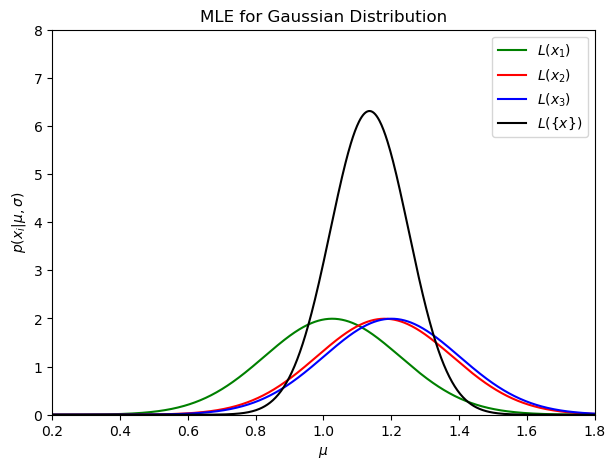

In [33]:
#Make the plot and see if you get the same as me.
xgrid = np.linspace(0,2,1000)

L1 = norm.pdf(xgrid,loc=sample[0],scale=sigma) #This is a Gaussian PDF sampled uniformly, centered at a specific location.
L2 = norm.pdf(xgrid,loc=sample[1],scale=sigma)
L3 = norm.pdf(xgrid,loc=sample[2],scale=sigma)
L = L1 * L2 * L3 #Total L is ???

fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(xgrid, L1, ls='-', c='green', label=r'$L(x_1)$')
plt.plot(xgrid, L2, ls='-', c='red', label=r'$L(x_2)$')
plt.plot(xgrid, L3, ls='-', c='blue', label=r'$L(x_3)$')
plt.plot(xgrid, L, ls='-', c='black', label=r'$L(\{x\})$')

plt.xlim(0.2, 1.8)
plt.ylim(0, 8.0)
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution')
plt.legend()

Now we can just read off the maximum likelihood solution.  <font color='red'>Use `np.argsort()` to figure out the index of the largest value and print that element of `xgrid`.</font>

In [32]:
sorted_indices = np.argsort(L)
index_max = sorted_indices[-1]
print(f"Likelihood is maximized at {xgrid[index_max]}")
print(f"Mean of the samples is {np.sum(sample)/N}")

Likelihood is maximized at 1.1591591591591592
Mean of the samples is 1.1358603578150104
